### About the Dataset

In [1]:

import pandas as pd

# Load your Excel file into a pandas DataFrame
file_path = "Loan Default Prediction Dataset_exported.csv"
raw_df = pd.read_csv(file_path)

# Display basic information about the raw dataset
print("Raw Dataset Overview:")
print(raw_df.info())

# Display summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(raw_df.describe())

# Display the first few rows of the raw dataset
print("\nFirst Few Rows of the Raw Dataset:")
print(raw_df.head())

Raw Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8736 entries, 0 to 8735
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LoanID          8736 non-null   object 
 1   Age             8736 non-null   int64  
 2   Income          8736 non-null   int64  
 3   LoanAmount      8736 non-null   int64  
 4   CreditScore     8736 non-null   int64  
 5   MonthsEmployed  8736 non-null   int64  
 6   NumCreditLines  8736 non-null   int64  
 7   InterestRate    8736 non-null   float64
 8   LoanTerm        8736 non-null   int64  
 9   DTIRatio        8736 non-null   float64
 10  Education       8736 non-null   object 
 11  MaritalStatus   8736 non-null   object 
 12  HasMortgage     8736 non-null   object 
 13  HasDependents   8736 non-null   object 
 14  LoanPurpose     8736 non-null   object 
 15  HasCoSigner     8736 non-null   object 
 16  Default         8736 non-null   int64  
dtypes: float64(

# Data Preprocessing

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

def preprocess_data(df):
    # Drop rows with missing values (you can customize this based on your dataset)
    df = df.dropna()

    # Drop 'LoanID' if present
    if 'LoanID' in df.columns:
        df = df.drop('LoanID', axis=1)

    # Separate features and target variable
    X = df.drop('Default', axis=1)
    y = df['Default']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Get the original column names for numeric and categorical features
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns

    # Create transformers for numerical and categorical features
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Combine transformers using ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Apply preprocessing to training set
    X_train_preprocessed = preprocessor.fit_transform(X_train)

    # Apply the same preprocessing to testing set
    X_test_preprocessed = preprocessor.transform(X_test)

    # Save the scalers
    scaler = preprocessor.named_transformers_['num']['scaler']
    joblib.dump(scaler, 'scaler.joblib')

    onehot_encoder = preprocessor.named_transformers_['cat']['onehot']
    joblib.dump(onehot_encoder, 'onehot_encoder.joblib')

    joblib.dump(preprocessor, 'preprocessor.joblib')

    return X_train_preprocessed, X_test_preprocessed, y_train, y_test





In [3]:
# Data Preprocessing
file_path = "Loan Default Prediction Dataset_exported.csv"
df = pd.read_csv(file_path)
X_train, X_test, y_train, y_test = preprocess_data(df)

# Building Neural Network Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define a more complex architecture of your neural network with additional layers
def build_neural_network(input_dim):
    model = Sequential()

    # Add input layer
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.5))

    # Add hidden layers
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))

    # Add more hidden layers
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))

    # Add output layer with sigmoid activation for binary classification
    model.add(Dense(1, activation='sigmoid'))

    return model

# Get the number of features for input_dim
input_dim = X_train.shape[1]

# Build the even more complex neural network model
model = build_neural_network(input_dim)

# Compile the model with binary crossentropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
print("Even More Complex Neural Network Model Summary:")
print(model.summary())


Even More Complex Neural Network Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3584      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout

# Training the Model

Simple Training

In [ ]:
# Set the number of epochs and batch size
epochs = 10
batch_size = 64

# Train the model on the training data
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Display training history (loss and accuracy over epochs)
print("\nTraining History:")
print(history.history)

# Display test performance
print("\nTest Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
175/175 [==============================] - 7s 10ms/step - loss: 0.3673 - accuracy: 0.8744 - val_loss: 0.3350 - val_accuracy: 0.8845
Epoch 2/10
175/175 [==============================] - 1s 6ms/step - loss: 0.3310 - accuracy: 0.8863 - val_loss: 0.3277 - val_accuracy: 0.8845
Epoch 3/10
175/175 [==============================] - 1s 6ms/step - loss: 0.3299 - accuracy: 0.8863 - val_loss: 0.3309 - val_accuracy: 0.8845
Epoch 4/10
175/175 [==============================] - 1s 6ms/step - loss: 0.3238 - accuracy: 0.8863 - val_loss: 0.3259 - val_accuracy: 0.8845
Epoch 5/10
175/175 [==============================] - 1s 6ms/step - loss: 0.3212 - accuracy: 0.8866 - val_loss: 0.3221 - val_accuracy: 0.8848
Epoch 6/10
175/175 [==============================] - 1s 6ms/step - loss: 0.3212 - accuracy: 0.8858 - val_loss: 0.3282 - val_accuracy: 0.8856
Epoch 7/10
175/175 [==============================] - 1s 6ms/step - loss: 0.3184 - accuracy: 0.8872 - val_loss: 0.3246 - val_accuracy: 0.8870
Epoch

Complex Training with
1.   EarlyStopping
2.   LearningRateScheduler



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Define a learning rate schedule function (you can customize this based on your needs)
def lr_schedule(epoch):
    if epoch < 5:
        return 0.001
    elif epoch < 10:
        return 0.0005
    else:
        return 0.0001

# Set the number of epochs and batch size
epochs = 20
batch_size = 64

# Define early stopping to stop training if the validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Define learning rate scheduler
lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model on the training data with learning rate scheduling and early stopping
history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Display training history (loss and accuracy over epochs)
print("\nTraining History:")
print(history.history)

# Display test performance
print("\nTest Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/20
175/175 [==============================] - 1s 6ms/step - loss: 0.3149 - accuracy: 0.8874 - val_loss: 0.3342 - val_accuracy: 0.8852 - lr: 0.0010
Epoch 2/20
175/175 [==============================] - 1s 6ms/step - loss: 0.3141 - accuracy: 0.8881 - val_loss: 0.3345 - val_accuracy: 0.8852 - lr: 0.0010
Epoch 3/20
175/175 [==============================] - 1s 6ms/step - loss: 0.3106 - accuracy: 0.8886 - val_loss: 0.3214 - val_accuracy: 0.8859 - lr: 0.0010
Epoch 4/20
175/175 [==============================] - 1s 6ms/step - loss: 0.3136 - accuracy: 0.8870 - val_loss: 0.3277 - val_accuracy: 0.8866 - lr: 0.0010
Epoch 5/20
175/175 [==============================] - 1s 6ms/step - loss: 0.3108 - accuracy: 0.8886 - val_loss: 0.3303 - val_accuracy: 0.8870 - lr: 0.0010
Epoch 6/20
110/110 [==============================] - 0s 3ms/step - loss: 0.3142 - accuracy: 0.8864

Training History:
{'loss': [0.31490153074264526, 0.3141362965106964, 0.31056925654411316, 0.31356266140937805, 0.31081625819

Evaluating the Model

110/110 [==============================] - 1s 4ms/step
Test Accuracy: 0.886441647597254
Precision: 0.5277777777777778
Recall: 0.09476309226932668
F1 Score: 0.160676532769556
ROC AUC Score: 0.7515258703000174


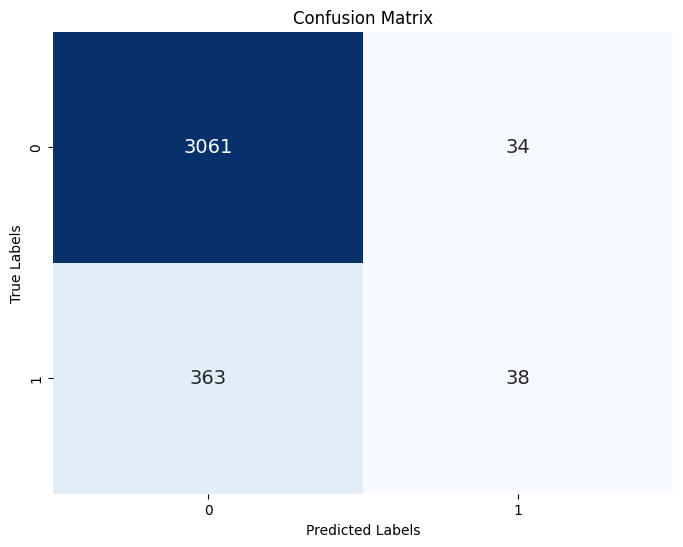

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Convert y_test to binary format (0 or 1)
y_test_binary = y_test.astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)
roc_auc = roc_auc_score(y_test_binary, y_pred)

# Display metrics
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Confusion Matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 14})
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


Fine Tunning the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Define a more advanced model
advanced_model = Sequential()
advanced_model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
advanced_model.add(BatchNormalization())
advanced_model.add(Dropout(0.5))
advanced_model.add(Dense(128, activation='relu'))
advanced_model.add(BatchNormalization())
advanced_model.add(Dropout(0.5))
advanced_model.add(Dense(64, activation='relu'))
advanced_model.add(BatchNormalization())
advanced_model.add(Dropout(0.5))
advanced_model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate and L2 regularization
advanced_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history_advanced = advanced_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)


Epoch 1/20
175/175 [==============================] - 3s 8ms/step - loss: 0.6659 - accuracy: 0.6704 - val_loss: 0.3729 - val_accuracy: 0.8845
Epoch 2/20
175/175 [==============================] - 1s 6ms/step - loss: 0.4342 - accuracy: 0.8312 - val_loss: 0.3277 - val_accuracy: 0.8852
Epoch 3/20
175/175 [==============================] - 1s 6ms/step - loss: 0.3794 - accuracy: 0.8641 - val_loss: 0.3205 - val_accuracy: 0.8866
Epoch 4/20
175/175 [==============================] - 1s 7ms/step - loss: 0.3635 - accuracy: 0.8744 - val_loss: 0.3180 - val_accuracy: 0.8866
Epoch 5/20
175/175 [==============================] - 1s 6ms/step - loss: 0.3474 - accuracy: 0.8797 - val_loss: 0.3178 - val_accuracy: 0.8859
Epoch 6/20
175/175 [==============================] - 1s 6ms/step - loss: 0.3388 - accuracy: 0.8809 - val_loss: 0.3184 - val_accuracy: 0.8856
Epoch 7/20
175/175 [==============================] - 2s 9ms/step - loss: 0.3331 - accuracy: 0.8850 - val_loss: 0.3181 - val_accuracy: 0.8863
Epoch 

110/110 [==============================] - 0s 2ms/step
Test Accuracy: 0.8861556064073226
Precision: 1.0
Recall: 0.007481296758104738
F1 Score: 0.014851485148514849
ROC AUC Score: 0.7502592468747357


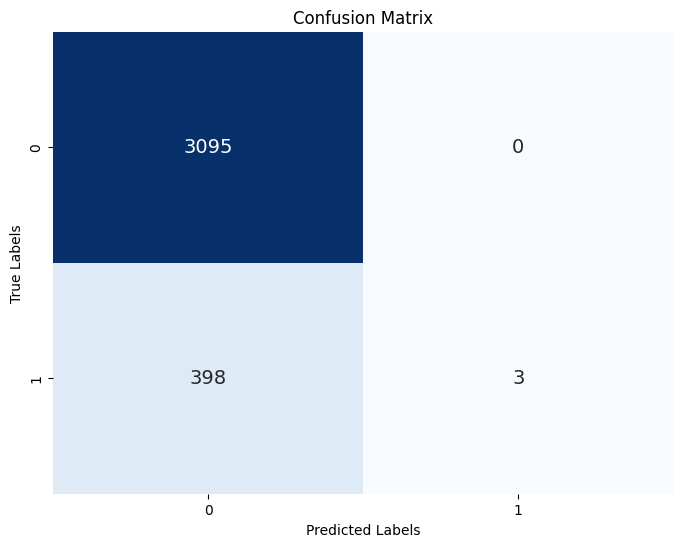

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions on the test set
y_pred = advanced_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Convert y_test to binary format (0 or 1)
y_test_binary = y_test.astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)
roc_auc = roc_auc_score(y_test_binary, y_pred)

# Display metrics
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Confusion Matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 14})
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


L2 Regularization

In [ ]:
from tensorflow.keras.regularizers import l2

advanced_model = Sequential()
advanced_model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)))
advanced_model.add(BatchNormalization())
advanced_model.add(Dropout(0.5))
advanced_model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
advanced_model.add(BatchNormalization())
advanced_model.add(Dropout(0.5))
advanced_model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
advanced_model.add(BatchNormalization())
advanced_model.add(Dropout(0.5))
advanced_model.add(Dense(1, activation='sigmoid'))

# Compile the model
advanced_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions on the test set
y_pred = advanced_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Convert y_test to binary format (0 or 1)
y_test_binary = y_test.astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)
roc_auc = roc_auc_score(y_test_binary, y_pred)

# Display metrics
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


110/110 [==============================] - 0s 2ms/step
Test Accuracy: 0.363558352402746
Precision: 0.11904761904761904
Recall: 0.7107231920199502
F1 Score: 0.2039355992844365
ROC AUC Score: 0.5409577832478578


More tuning the improve the scores

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score

# Train the model with L2 regularization and early stopping
history_l2 = advanced_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)

# Evaluate the model on the test set
y_pred_prob = advanced_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Adjust the threshold and calculate metrics
threshold = 0.3  # Experiment with different threshold values
y_pred_adjusted = (y_pred_prob > threshold).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_pred_adjusted))

print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))


Epoch 1/20
175/175 [==============================] - 4s 10ms/step - loss: 3.0407 - accuracy: 0.6660 - val_loss: 2.1676 - val_accuracy: 0.8845
Epoch 2/20
175/175 [==============================] - 1s 6ms/step - loss: 1.7934 - accuracy: 0.8337 - val_loss: 1.3655 - val_accuracy: 0.8845
Epoch 3/20
175/175 [==============================] - 1s 6ms/step - loss: 1.1818 - accuracy: 0.8658 - val_loss: 0.9403 - val_accuracy: 0.8845
Epoch 4/20
175/175 [==============================] - 1s 7ms/step - loss: 0.8408 - accuracy: 0.8732 - val_loss: 0.6973 - val_accuracy: 0.8845
Epoch 5/20
175/175 [==============================] - 1s 6ms/step - loss: 0.6477 - accuracy: 0.8746 - val_loss: 0.5535 - val_accuracy: 0.8848
Epoch 6/20
175/175 [==============================] - 1s 6ms/step - loss: 0.5193 - accuracy: 0.8830 - val_loss: 0.4758 - val_accuracy: 0.8845
Epoch 7/20
175/175 [==============================] - 1s 6ms/step - loss: 0.4551 - accuracy: 0.8828 - val_loss: 0.4219 - val_accuracy: 0.8845
Epoch

Ensembling

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Assume you have already preprocessed X_train and y_train

# Define individual classifiers
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
lr_classifier = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
svm_classifier = make_pipeline(StandardScaler(), SVC(probability=True, random_state=42))

# Create a Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('random_forest', rf_classifier),
        ('logistic_regression', lr_classifier),
        ('svm', svm_classifier)
    ],
    voting='soft'  # Use soft voting for probability-based ensemble
)

# Evaluate the ensemble using cross-validation
y_pred = cross_val_predict(voting_classifier, X_train, y_train, cv=5, method='predict_proba')[:, 1]

# Threshold the probabilities to get binary predictions
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

# Evaluate the performance
print("Ensemble Performance:")
print(classification_report(y_train, y_pred_binary))
print("Accuracy:", accuracy_score(y_train, y_pred_binary))


Ensemble Performance:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     12385
         1.0       0.74      0.01      0.02      1595

    accuracy                           0.89     13980
   macro avg       0.81      0.51      0.48     13980
weighted avg       0.87      0.89      0.84     13980

Accuracy: 0.886695278969957


In [ ]:
pip install imbalanced-learn


Adding OverSampling

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# Assume you have already preprocessed X_train and y_train

# Handle class imbalance with oversampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Define individual classifiers
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
lr_classifier = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
svm_classifier = make_pipeline(StandardScaler(), SVC(probability=True, random_state=42))

# Create a Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('random_forest', rf_classifier),
        ('logistic_regression', lr_classifier),
        ('svm', svm_classifier)
    ],
    voting='soft'  # Use soft voting for probability-based ensemble
)

# Evaluate the ensemble using cross-validation
y_pred = cross_val_predict(voting_classifier, X_resampled, y_resampled, cv=5, method='predict_proba')[:, 1]

# Threshold the probabilities to get binary predictions
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

# Evaluate the performance
print("Ensemble Performance:")
print(classification_report(y_resampled, y_pred_binary))
print("Accuracy:", accuracy_score(y_resampled, y_pred_binary))


Ensemble Performance:
              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90     12385
         1.0       0.87      0.95      0.91     12385

    accuracy                           0.90     24770
   macro avg       0.91      0.90      0.90     24770
weighted avg       0.91      0.90      0.90     24770

Accuracy: 0.9044812272910779


In [ ]:
#saving the model

In [ ]:
from sklearn.ensemble import VotingClassifier
import joblib


# Save the ensemble model
joblib.dump(voting_classifier, 'ensemble_model.joblib')


# Predicting New Data

In [4]:
import pandas as pd
import joblib

# Load the saved preprocessors and ensemble model
preprocessor = joblib.load('preprocessor.joblib')
voting_classifier = joblib.load('ensemble_model.joblib')

# Manually input new data
new_data = {
    'Age': 29,
    'Income': 129670,
    'LoanAmount': 213947,
    'CreditScore': 593,
    'MonthsEmployed': 49,
    'NumCreditLines': 4,
    'InterestRate': 7.07,
    'LoanTerm': 60,
    'DTIRatio': 0.89,
    'Education': "Bachelor's",
    'MaritalStatus': "Single",
    'HasMortgage': "Yes",
    'HasDependents': "No",
    'LoanPurpose': "Business",
    'HasCoSigner': "No",
}

# Create a DataFrame with a single row using the new data
new_data_df = pd.DataFrame([new_data])

# Apply the same preprocessing to the new data
X_new_data = preprocessor.transform(new_data_df)

# Fit the ensemble model on the training data
X_train, _, y_train, _ = preprocess_data(df)  # Assuming preprocess_data function is defined
voting_classifier.fit(X_train, y_train)

# Make predictions
predictions = voting_classifier.predict(X_new_data)

# Display the predictions
print("Predictions for the new data:")
print(predictions)


Predictions for the new data:
[0.]
